In [1]:
timeout = 600
import os
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rcParams.update({'font.size': 18})


def get_run_times(filepath):
    total = 0
    with open(filepath) as f:
        runtimes = []
        i = 0
        for line in f:
            if i % 2 != 0:
                s = line.split(',')
                utime = float(s[-1].split('_')[1])
                ktime = float(s[-1].split('_')[-1])
                time = utime + ktime
                total += 1
                if time <= timeout:
                    runtimes.append(time)
            i += 1
        return sorted(runtimes), total
        
def get_cactus(runtime):
    y = [0 for _ in range(timeout+1)]
    for time in runtime[0]:
        y[math.ceil(time)] += 1
    for i in range(1, len(y)):
        y[i] += y[i-1]
    for i in range(len(y)):
        y[i] /= runtime[1]
    subx = [0]
    suby = [y[0]]
    for i in range(len(y)):
        if y[i] != y[i-1]:
            subx.append(i)
            suby.append(y[i])
    return subx, suby

def cactus_plot(runtimes, outputfile, legend):
    fig = plt.figure()
    ax = plt.subplot(111)
                
    legends_to_add = []
    if legend is not None:
        for i, leg_prop in enumerate(list(map_legend.keys())):
            print(leg_prop, map_legend[leg_prop])
            lg = ax.legend(loc=legend['loc'], bbox_to_anchor=(1.04, 1), handles=map_legend[leg_prop])
            legends_to_add.append(lg)

    for x in legends_to_add[:-1]:
        plt.gca().add_artist(x)
                

    box = ax.get_position()
    plt.xlim((0, timeout))
    #if legend is not None:
    #    ax.legend(loc=legend['loc'], bbox_to_anchor=legend['anchor'], ncol = legend['ncol'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.xlabel('Run time in seconds')
    plt.ylabel('Percentage of instance solved')
    plt.grid(color='0.9')
    plt.savefig(os.path.join('.', outputfile + '.pdf'), bbox_inches="tight")
    plt.show()
    
color_gpmc = '#000000'
color_d4 = '#D55E00'
color_sch = '#56B4E9'

enc1_linestyle = 'solid'
enc3_linestyle = 'dotted'
enc4_linestyle = 'dashed'
enc4linp_linestyle = 'dashdot'
pwmc_linestyle = 'dotted'

sch_linestyle = 'dotted'
marker_min_in = 'd'
marker_max_deg = '+'
marker_min_out = 's'
marker_fiedler = 'v'

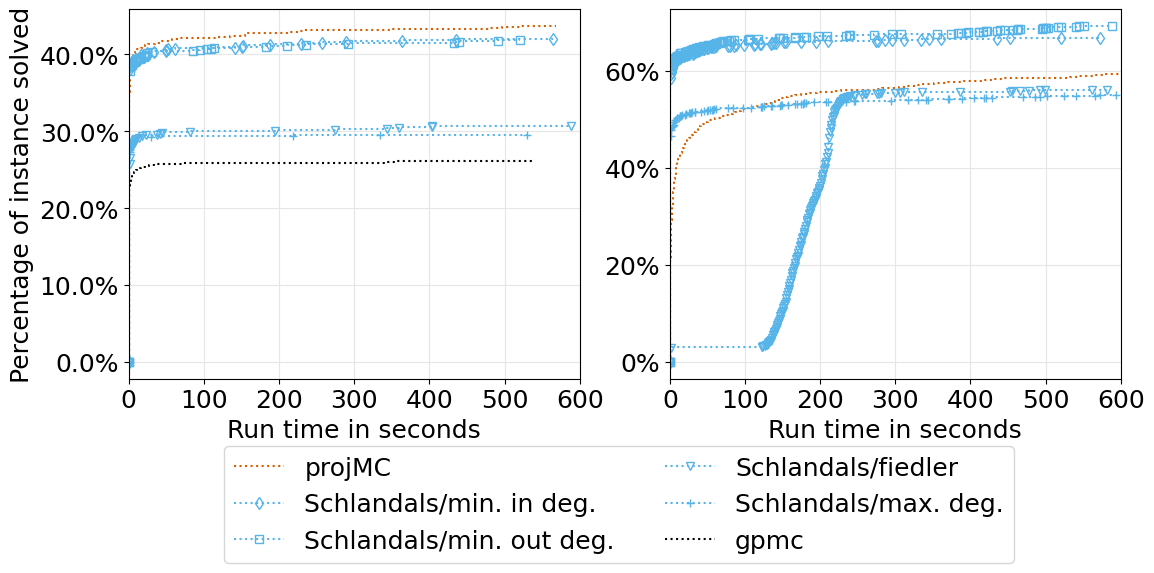

In [4]:
pg_min_in = get_run_times('pg/pg_min_in.csv')
pg_min_out = get_run_times('pg/pg_min_out.csv')
pg_max_deg = get_run_times('pg/pg_max_deg.csv')
pg_fiedler = get_run_times('pg/fiedler.csv')
pg_gpmc = get_run_times('pg/gpmc_pg.csv')
pg_projMC = get_run_times('pg/projMC_pg.csv')

rpg = [
    (pg_projMC, {'color': color_d4, 'linestyle': pwmc_linestyle, 'label': 'projMC'}),
    (pg_min_in, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':marker_min_in, 'label': 'Schlandals/min. in deg.'}),
    (pg_min_out, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': marker_min_out, 'label': 'Schlandals/min. out deg.'}),
    (pg_fiedler, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': marker_fiedler, 'label': 'Schlandals/fiedler'}),
    (pg_max_deg, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':marker_max_deg, 'label': 'Schlandals/max. deg.'}),
    (pg_gpmc, {'color': color_gpmc, 'linestyle': pwmc_linestyle, 'label': 'gpmc'}),
]


wn_min_in = get_run_times('wn/wn_min_in.csv')
wn_min_out = get_run_times('wn/wn_min_out.csv')
wn_max_deg = get_run_times('wn/wn_max_deg.csv')
wn_fiedler = get_run_times('wn/fiedler.csv')
wn_gpmc = get_run_times('wn/gpmc_wn.csv')
wn_projMC = get_run_times('wn/projMC_wn.csv')

rwn = [
    (wn_gpmc, {'color': color_gpmc, 'linestyle': pwmc_linestyle, 'label': 'gpmc'}),
    (wn_projMC, {'color': color_d4, 'linestyle': pwmc_linestyle, 'label': 'projMC'}),
    (wn_min_in, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':marker_min_in, 'label': 'Schlandals/min. in deg.'}),
    (wn_max_deg, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':marker_max_deg, 'label': 'Schlandals/max. deg.'}),
    (wn_min_out, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': marker_min_out, 'label': 'Schlandals/min. out deg.'}),
    (wn_fiedler, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': marker_fiedler, 'label': 'Schlandals/fiedler'}),
]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=[12.8, 4.8])

for runtime, style in rpg:
    x, y = get_cactus(runtime)
    ax1.step(x, y,
                linestyle=style['linestyle'],
                color=style['color'],
                label=style['label'],
                fillstyle='none',
                marker= style['marker'] if 'marker' in style else None)

for runtime, style in rwn:
    x, y = get_cactus(runtime)
    ax2.step(x, y,
                linestyle=style['linestyle'],
                color=style['color'],
                label=style['label'],
                fillstyle='none',
                marker= style['marker'] if 'marker' in style else None)

for ax in ax1, ax2:
    ax.set_xlabel('Run time in seconds')
    ax.grid(color='0.9')
    if ax == ax1:
        ax.set_ylabel('Percentage of instance solved')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))



plt.xlim((0, timeout))

lines, labels = ax1.get_legend_handles_labels()
fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(0.19, -0.3), ncol=2)
plt.savefig(os.path.join('.', 'wn-pg.pdf'), bbox_inches="tight")
plt.show()


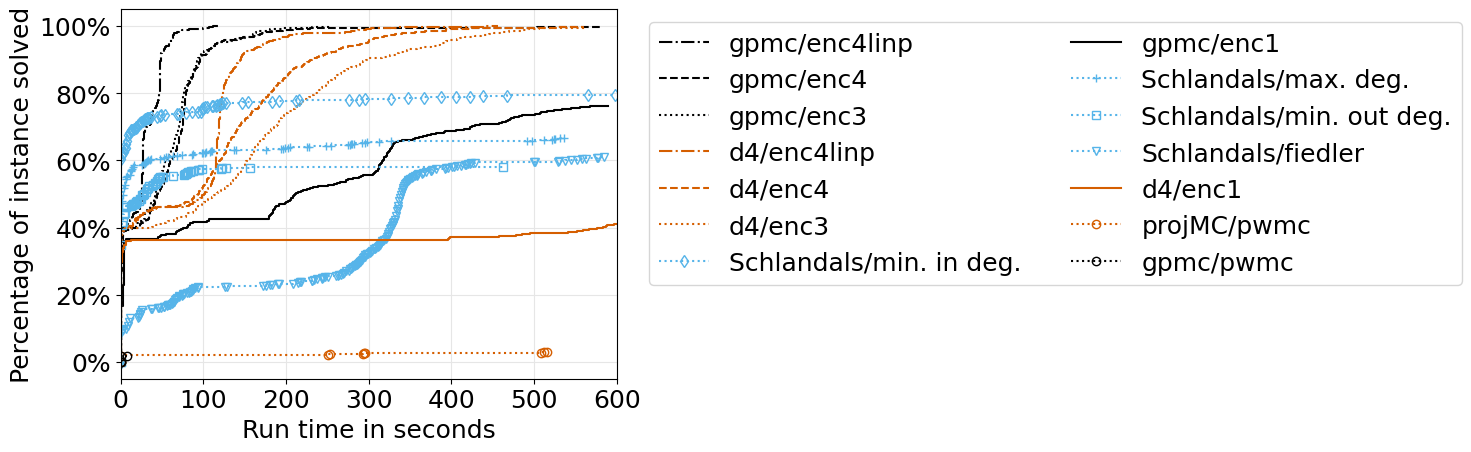

In [6]:
bn_min_in = get_run_times('bn/bn_min_in.csv')
bn_min_out = get_run_times('bn/bn_min_out.csv')
bn_max_deg = get_run_times('bn/bn_max_deg.csv')
bn_fiedler = get_run_times('bn/bn_fiedler.csv')
gpmc_pcnf = get_run_times('bn/gpmc_pcnf.csv')

gpmc_enc1 = get_run_times('bn/gpmc_enc1.csv')
gpmc_enc3 = get_run_times('bn/gpmc_enc3.csv')
gpmc_enc4 = get_run_times('bn/gpmc_enc4.csv')
gpmc_enc4log = get_run_times('bn/gpmc_enc4_log.csv')
projMC_pcnf = get_run_times('bn/projMC_pcnf.csv')
d4_enc1 = get_run_times('bn/d4_enc1.csv')
d4_enc3 = get_run_times('bn/d4_enc3.csv')
d4_enc4 = get_run_times('bn/d4_enc4.csv')
d4_enc4log = get_run_times('bn/d4_enc4_log.csv')

r = [
    (gpmc_enc4log, {'color': color_gpmc, 'linestyle': enc4linp_linestyle, 'label': 'gpmc/enc4linp'}),
    (gpmc_enc4, {'color': color_gpmc, 'linestyle': enc4_linestyle, 'label': 'gpmc/enc4'}),
    (gpmc_enc3, {'color': color_gpmc, 'linestyle': enc3_linestyle, 'label': 'gpmc/enc3'}),
    (d4_enc4log, {'color': color_d4, 'linestyle': enc4linp_linestyle, 'label': 'd4/enc4linp'}),
    (d4_enc4, {'color': color_d4, 'linestyle': enc4_linestyle, 'label': 'd4/enc4'}),
    (d4_enc3, {'color': color_d4, 'linestyle': enc3_linestyle, 'label': 'd4/enc3'}),
    (bn_min_in, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':'d', 'label': 'Schlandals/min. in deg.'}),
    (gpmc_enc1, {'color': color_gpmc, 'linestyle': enc1_linestyle, 'label': 'gpmc/enc1'}),
    (bn_max_deg, {'color': color_sch, 'linestyle': sch_linestyle, 'marker':'+', 'label': 'Schlandals/max. deg.'}),
    (bn_min_out, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': 's', 'label': 'Schlandals/min. out deg.'}),
    (bn_fiedler, {'color': color_sch, 'linestyle': sch_linestyle, 'marker': 'v', 'label': 'Schlandals/fiedler'}),
    (d4_enc1, {'color': color_d4, 'linestyle': enc1_linestyle, 'label': 'd4/enc1'}),
    (projMC_pcnf, {'color': color_d4, 'linestyle': pwmc_linestyle, 'marker': 'o', 'label': 'projMC/pwmc'}),
    (gpmc_pcnf, {'color': color_gpmc, 'linestyle': pwmc_linestyle, 'marker':'o', 'label': 'gpmc/pwmc'}),
]

ax = plt.subplot(111)
for runtime, style in r:
    x, y = get_cactus(runtime)
    ax.step(x, y,
                linestyle=style['linestyle'],
                color=style['color'],
                label=style['label'],
                fillstyle='none',
                marker= style['marker'] if 'marker' in style else None)

box = ax.get_position()
plt.xlim((0, timeout))
ax.legend(loc='best', bbox_to_anchor=(1.04, 1), ncol = 2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xlabel('Run time in seconds')
plt.ylabel('Percentage of instance solved')
plt.grid(color='0.9')
plt.savefig(os.path.join('.', 'bn.pdf'), bbox_inches="tight")
plt.show()